# Probability Exercises

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

## 1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

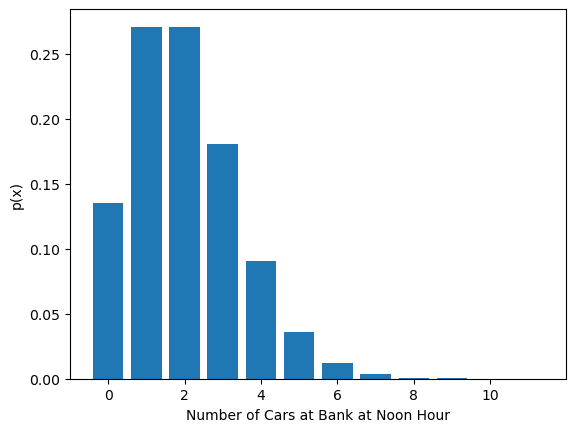

In [8]:
lmda = 2
car_dist = stats.poisson(lmda)

x = np.arange(0,12)
y = [car_dist.pmf(i) for i in x]

plt.bar(x,y)
plt.xlabel('Number of Cars at Bank at Noon Hour')
plt.ylabel('p(x)')
plt.show()

### a.  What is the probability that no cars drive up in the noon hour?

In [9]:
car_dist.pmf(0)

0.1353352832366127

### b. What is the probability that 3 or more cars come through the drive through?

In [10]:
car_dist.sf(2)

0.32332358381693654

### 3. How likely is it that the drive through gets at least 1 car?

In [11]:
car_dist.sf(0)

0.8646647167633873

## 2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

### a. What grade point average is required to be in the top 5% of the graduating class?

In [92]:
mean = 3
standev = 0.3
grad_dist = stats.norm(mean,standev)
grad_dist.isf(.05)

3.4934560880854417

### b. What GPA constitutes the bottom 15% of the class?

In [94]:
grad_dist.isf(.15)
#Instructor Answer: grad_dist.ppf(.15)

3.310930016848137

### c. An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?

In [28]:
grad_dist.ppf([6.9/10,8/10])
# No
'''
Instructor Answer:
1st decile: 0-10 percent
2nd decile: 10-20 percent
3rd decile: 20-30 percent
grade_dist.ppf([0.2, 0.3])'''

array([3.1487551 , 3.25248637])

### d. If I have a GPA of 3.5, what percentile am I in?

In [23]:
grad_dist.pdf(3.5)
#Instructor Answer: grade_dist.cdf(3.5)

0.3315904626424956

## 3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [25]:
mean = 0.02
visitors = 4326
click_dist = stats.binom(visitors, mean)
click_dist.sf(96)

0.13975823631416445

## 4. You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

### a. What is the probability that at least one of your first 60 answers is correct?

In [95]:
n_questions = 100
#Instructor Answer: n_questions = 60
# guess_dist.sf(0)
p_right= .01
guess_dist = stats.binom(n_questions, p_right)
guess_dist.pmf(1)

0.36972963764972655

## 5. The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? How likely is it that it goes two days without getting cleaned up? All week?

In [46]:
daily_visitors = round((3 * 22) * .9)
chance_clean = .03
clean_breakroom_dist = stats.binom(daily_visitors, chance_clean)
clean_breakroom_dist.pmf(1)
#instructor answer: clean_breakroom_dist.sf(0)

0.30250590303772024

In [52]:
daily_visitors = round((3 * 22) * .9)
chance_clean = .03
clean_breakroom_dist = stats.binom(daily_visitors, chance_clean)
1 - clean_breakroom_dist.pmf(2)
#n = round(3 * 22 * .9)
#p = .03
#Instructor answer: stats.binom(n * 2, p).pmf(0)

0.7286802725331787

In [53]:
daily_visitors = round((3 * 22) * .9)
chance_clean = .03
clean_breakroom_dist = stats.binom(daily_visitors, chance_clean)
1 - clean_breakroom_dist.pmf(5)
#Instructor answer: stats.binom(n * 5, p).pmf(0)

0.9765142596424636

## 6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [ ]:
mean = 15
standdev = 3
'''
Instructor answer:
mean = 15 * 2
stddev = 3 * 2

Max time I can be in line without being late to class = 60 - 15 - 10 - 2 = 33 mins

stats.norm(mean,stddev).cdf(33)
'''


## 7.  Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

In [76]:
import env
url = env.get_db_url('employees')
current_salaries = pd.read_sql('''
SELECT salary
FROM salaries
WHERE to_date = '9999-01-01'
''', url)

### a. What percent of employees earn less than 60,000?

In [82]:
mean = current_salaries.mean()
standdev = current_salaries.std()
salary_dist= stats.norm(mean,standdev)
salary_dist.cdf(60_000)

array([0.24385742])

### b. What percent of employees earn more than 95,000?

In [83]:
salary_dist.sf(95_000)

array([0.09208819])

### c. What percent of employees earn between 65,000 and 80,000?

In [88]:
salary_dist.sf([64_999, 80_000])
#Instructor answer: salary_dist.cdf([65_000, 80_000])

array([0.65731831, 0.32223651])

### d. What do the top 5% of employees make?

In [91]:
salary_dist.isf(.05)

array([100484.64454103])